In [18]:
import verde as vd
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pyproj

import my_funcs as mf

from shapely import geometry


%matplotlib widget

gdb = '/home/ggrl/geodatabase/'

In [19]:
import my_funcs as mf


In [22]:
df = mf.litologia('malha_cartog_100k')

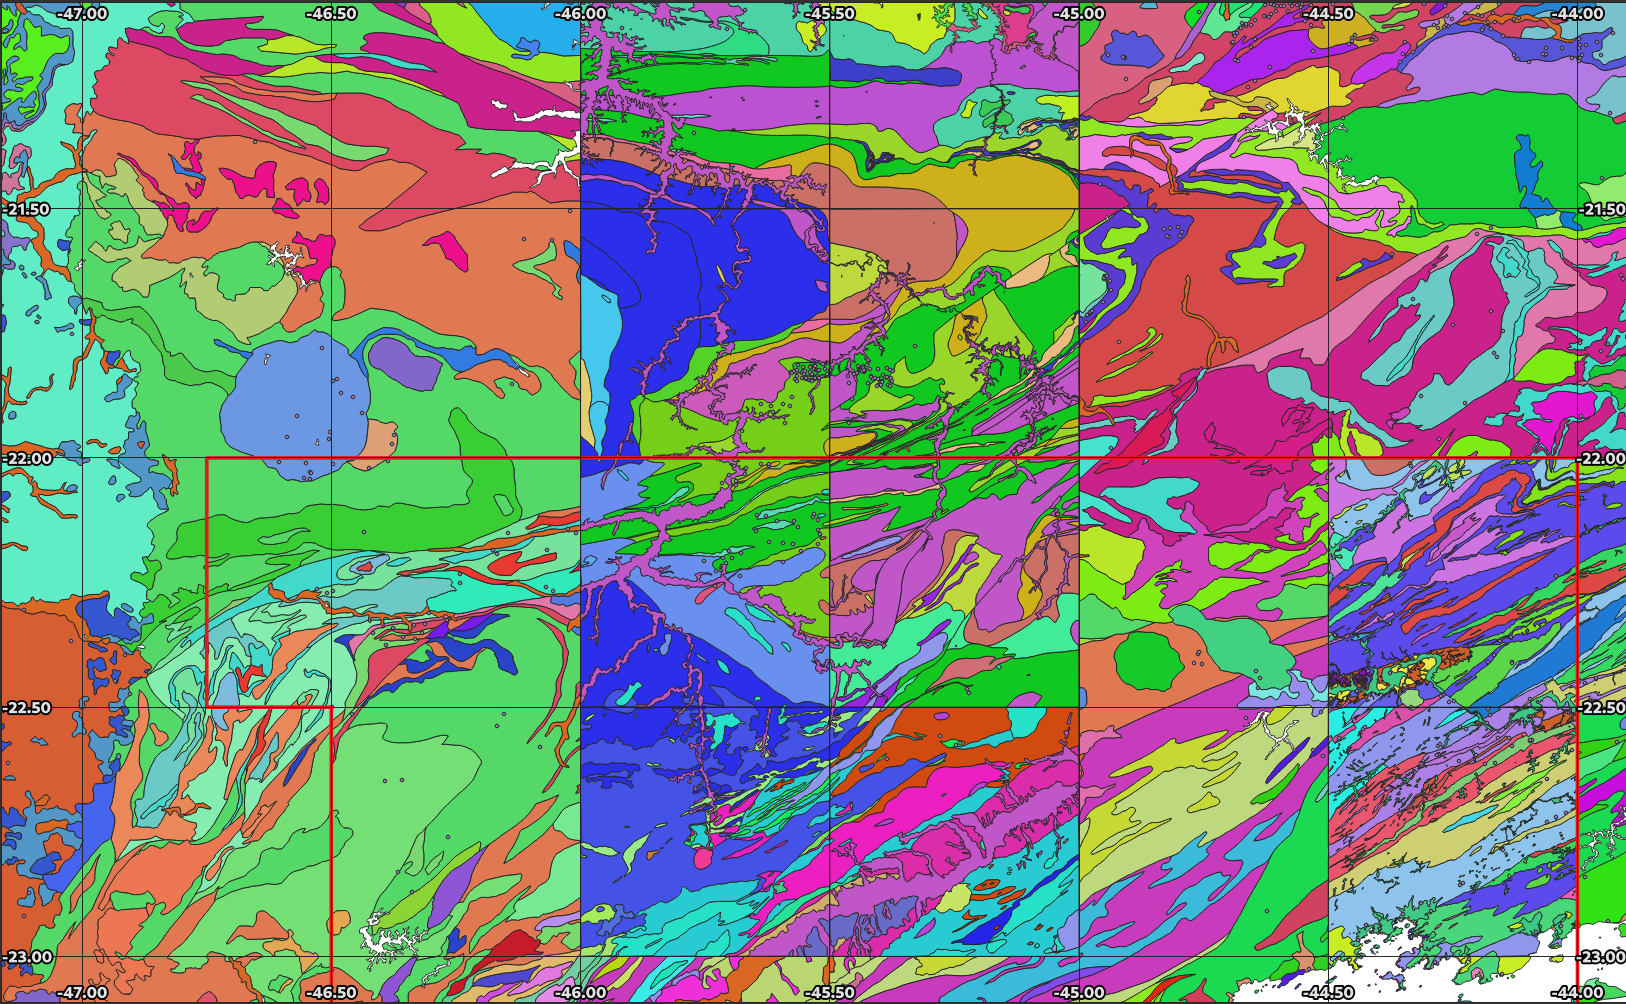

In [2]:
from IPython.display import Image
Image("/home/ggrl/Desktop/aoi.png")

In [3]:
# DADOS BRUTOS
g_1105 = pd.read_csv(gdb+'geof/g1105')
m_1105 = pd.read_csv(gdb+'geof/m1105')

g_3022 = pd.read_csv(gdb+'geof/g3022.csv')
m_3022 = pd.read_csv(gdb+'geof/m3022.csv')

geof_1039 = pd.read_csv(gdb+'geof/geof_1039')

g_1089 = pd.read_csv(gdb+'geof/g1089')
m_1089 = pd.read_csv(gdb+'geof/m1089')

In [4]:
l_1kk = mf.litologia('l_1kk')
l_100k = mf.litologia('l_100k')
l_50k = mf.litologia('l_50k')

In [5]:
# Setting projections

# South America WGS 84 Geográfica
p1 = pyproj.Proj("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")

# WGS84 UTM 
p2 = pyproj.Proj("+proj=utm +zone=23 +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs")

In [6]:
# 1105
m_1105['X_WGS'], m_1105['Y_WGS'] = pyproj.transform(p1, p2,
                                                m_1105.LONGITUDE.values,
                                                m_1105.LATITUDE.values)

g_1105['X_WGS'], g_1105['Y_WGS'] = pyproj.transform(p1, p2,
                                                g_1105.LONGITUDE.values,
                                                g_1105.LATITUDE.values)

<ipython-input-6-46fccd29b83c>:2: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  m_1105['X_WGS'], m_1105['Y_WGS'] = pyproj.transform(p1, p2,
<ipython-input-6-46fccd29b83c>:6: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  g_1105['X_WGS'], g_1105['Y_WGS'] = pyproj.transform(p1, p2,


In [8]:
#3022
m_3022['LONGITUDE'], m_3022['LATITUDE'] = pyproj.transform(p1, p1,
                                                m_3022.LONG_WGS.values,
                                                m_3022.LAT_WGS.values)

<ipython-input-8-5754b0b3b1d9>:2: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  m_3022['LONGITUDE'], m_3022['LATITUDE'] = pyproj.transform(p1, p1,


In [7]:
g_1089.head(5)

,X,Y,MDT,KPERC,eU,eth,CTCOR,LONGITUDE,LATITUDE
0,528115.65,8756161.26,522.35,0.38,1.46,18.83,1371.89,-44.742414,-11.251846
1,528035.37,8756163.26,522.77,0.43,1.06,15.94,1170.76,-44.743149,-11.251829
2,527955.11,8756164.95,522.11,0.44,1.08,13.13,1016.51,-44.743884,-11.251814
3,527874.82,8756166.56,522.05,0.42,1.47,11.12,946.89,-44.744620,-11.251800
4,527794.50,8756168.02,522.57,0.43,1.78,10.41,948.79,-44.745356,-11.251787
5,527714.22,8756169.39,522.50,0.49,1.50,10.04,909.40,-44.746091,-11.251776
6,527633.97,8756170.52,522.33,0.56,1.03,10.00,870.51,-44.746827,-11.251766
7,527553.75,8756171.19,521.44,0.62,0.83,10.05,862.55,-44.747562,-11.251761
8,527473.64,8756171.21,521.27,0.64,0.78,9.58,837.10,-44.748296,-11.251761
9,527393.61,8756170.79,520.05,0.69,0.72,9.35,828.89,-44.749029,-11.251766


In [6]:
geof_1039.head(5)

,UTME,UTMN,LONG,LAT,MAGR,THC,UC,KC,CTC
0,684002.0,7335281.0,-49.190033,-24.083740,-144.49,45.56,5.05,14.96,714.25
1,684003.0,7335381.0,-49.190048,-24.082840,-147.53,53.58,0.00,27.56,708.61
2,684004.0,7335481.0,-49.190048,-24.081940,-144.57,52.58,14.07,15.95,837.01
3,684005.0,7335581.0,-49.190048,-24.081039,-146.61,51.68,0.00,46.94,862.91
4,684006.0,7335681.0,-49.190048,-24.080124,-156.65,62.20,21.64,12.20,898.35
...,...,...,...,...,...,...,...,...,...
539044,329329.0,7563776.0,-46.653473,-22.022064,92.53,70.13,20.86,245.36,2177.98
539045,329426.0,7563774.0,-46.652527,-22.022095,100.51,54.54,19.79,279.66,2144.92
539046,329523.0,7563771.0,-46.651596,-22.022125,100.50,74.22,19.75,236.94,2081.99
539047,329620.0,7563769.0,-46.650650,-22.022156,96.48,68.61,5.81,235.28,1978.74


In [ ]:
lista_region = 

In [13]:
region = [-47.00, -46.75,
          -22.75, -22.50]

geof_SF23_Y_A_V_4 = geof_1039[vd.inside((geof_1039.LONG, geof_1039.LAT), region = region)]

In [14]:
geof_SF23_Y_A_V_4

,UTME,UTMN,LONG,LAT,MAGR,THC,UC,KC,CTC
398044,295035.0,7510341.0,-46.992386,-22.500824,74.17,23.43,10.16,21.38,558.02
398045,295038.0,7510240.0,-46.992386,-22.501740,76.23,9.63,19.72,0.00,452.86
398046,295040.0,7510138.0,-46.992371,-22.502655,77.29,12.72,10.22,10.30,472.00
398047,295043.0,7510037.0,-46.992355,-22.503571,78.35,28.26,10.37,6.22,499.45
398048,295045.0,7509936.0,-46.992355,-22.504486,79.41,36.31,0.00,16.80,495.56
...,...,...,...,...,...,...,...,...,...
533176,319594.0,7504134.0,-46.754456,-22.559647,140.93,16.18,3.46,133.30,976.50
533177,319693.0,7504135.0,-46.753494,-22.559647,142.90,25.33,6.40,140.30,952.95
533178,319798.0,7504133.0,-46.752472,-22.559677,141.88,32.15,0.00,112.73,880.01
533179,319903.0,7504131.0,-46.751465,-22.559708,142.86,29.46,0.00,117.71,885.25


In [58]:
plt.figure(figsize=(8,8))
plt.scatter(geof_SF23_Y_A_V_4.LONG,geof_SF23_Y_A_V_4.LAT,
            c=geof_SF23_Y_A_V_4.MAGR,
            s=5)
plt.colorbar()
plt.axis('scaled')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(-47.0118615, -46.7378185, -22.7623869, -22.487521100000002)

In [68]:
geof_SF23_Y_A_VI_3.to_csv(gdb+'geof/recortado/geof_SF23_Y_A_VI_3',index=False)

In [3]:
g_1089 = pd.read_csv(gdb+'geof/g1089')

m_1089 = pd.read_csv(gdb+'geof/m1089')

In [27]:
mf.nomeador_grid(-45.00,-44.50,-11.00,-10.50,4)

'SC23-Z-C-I'

In [28]:
mf.nomeador_grid(-44.75,-44.50,-10.75,-10.50,4) 

'SC23-Z-A-IV-4'

In [19]:
region = [-45,-44.5,-11,-10.5]


In [20]:
gama_SC23_Z_C_I = g_1089[vd.inside((g_1089.LONGITUDE, g_1089.LATITUDE), region = region)]

mag_SC23_Z_C_I = m_1089[vd.inside((m_1089.LONGITUDE, m_1089.LATITUDE), region = region)]

In [21]:
gama_SC23_Z_C_I

,X,Y,MDT,KPERC,eU,eth,CTCOR,LONGITUDE,LATITUDE
2512,500020.25,8786155.43,477.68,0.35,1.25,16.12,1182.85,-44.999815,-10.980692
2513,500103.83,8786158.77,476.83,0.63,1.24,14.00,1143.89,-44.999050,-10.980662
2514,500187.24,8786161.64,476.58,1.02,1.38,12.02,1165.74,-44.998286,-10.980636
2515,500270.50,8786163.59,470.91,1.41,1.51,11.31,1257.68,-44.997524,-10.980618
2516,500353.54,8786165.69,464.63,1.71,1.65,11.14,1357.00,-44.996764,-10.980599
...,...,...,...,...,...,...,...,...,...
264652,554618.93,8838871.32,477.57,0.96,1.98,17.01,1507.21,-44.500850,-10.503529
264653,554619.00,8838949.65,471.69,0.95,1.47,15.02,1327.04,-44.500850,-10.502821
264654,554618.94,8839028.43,463.98,0.80,1.17,12.29,1087.91,-44.500852,-10.502108
264655,554618.52,8839107.80,454.86,0.63,1.10,9.72,881.47,-44.500857,-10.501391


In [22]:
mag_SC23_Z_C_I

,X,Y,MDT,MAGIGRF,LONGITUDE,LATITUDE
25682,500003.48,8786154.65,477.86,49.356,-44.999968,-10.980699
25683,500011.87,8786155.04,477.53,47.711,-44.999891,-10.980696
25684,500020.25,8786155.43,477.68,45.933,-44.999815,-10.980692
25685,500028.61,8786155.76,477.25,44.023,-44.999738,-10.980689
25686,500036.97,8786156.10,477.11,41.991,-44.999662,-10.980686
...,...,...,...,...,...,...
2647164,554617.62,8839227.11,452.58,19.672,-44.500867,-10.500311
2647165,554617.55,8839235.09,453.00,18.881,-44.500868,-10.500239
2647166,554617.48,8839243.06,453.43,18.084,-44.500869,-10.500167
2647167,554617.41,8839251.04,453.85,17.284,-44.500869,-10.500095


In [23]:
plt.figure(figsize=(8,8))
plt.scatter(gama_SC23_Z_C_I.LONGITUDE,gama_SC23_Z_C_I.LATITUDE,
            c=gama_SC23_Z_C_I.CTCOR,
            s=0.5)
plt.colorbar()
plt.axis('scaled')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(-45.024949145, -44.475002495, -11.0249913665, -10.4750042035)

In [29]:
plt.figure(figsize=(8,8))
plt.scatter(mag_SC23_Z_C_I.LONGITUDE,mag_SC23_Z_C_I.LATITUDE,
            c=mag_SC23_Z_C_I.MAGIGRF,
            s=0.5,
            cmap='hsv')
plt.colorbar()
plt.axis('scaled')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(-45.0249827555, -44.4750008945, -11.024998654500001, -10.4750000955)

In [30]:
gama_SC23_Z_C_I.to_csv(gdb+'geof/recortado/gama_SC23_Z_C_I',index=False)
mag_SC23_Z_C_I.to_csv(gdb+'geof/recortado/mag_SC23_Z_C_I',index=False)

In [7]:
rparaim.plot('SIGLA')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:>

In [34]:
bounds =  rparaim.unary_union.bounds

NameError: name 'rparaim' is not defined

In [18]:
varginha.plot('SIGLA')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:>

In [19]:
bounds =  varginha.unary_union.bounds

In [20]:
bounds

(-45.50000000025002,
 -21.999999999999982,
 -45.00000000000001,
 -21.499999999999993)

In [21]:
region = [bounds[0],bounds[2],
          bounds[1],bounds[3]]

In [22]:
region

[-45.50000000025002,
 -45.00000000000001,
 -21.999999999999982,
 -21.499999999999993]

In [ ]:
g_rparaim = g_1089[vd.inside((g_1089.LONGITUDE, g_1089.LATITUDE), region = region)]

In [23]:
g_3022

,CTCOR,eTh,eU,KPERC,LATITUDE,LONGITUDE,MDT,X,Y
0,644.27,6.9,-0.1,0.791,-21.236695,-47.054024,699.38,286856.47,7650282.76
1,577.39,6.5,-0.1,0.681,-21.237383,-47.054043,697.18,286855.49,7650206.55
2,520.33,5.9,-0.1,0.587,-21.238073,-47.054056,707.69,286855.13,7650130.13
3,494.39,5.3,0.1,0.566,-21.238763,-47.054064,721.80,286855.29,7650053.72
4,502.44,4.8,0.2,0.634,-21.239452,-47.054070,727.61,286855.66,7649977.42
...,...,...,...,...,...,...,...,...,...
676761,-21.96,0.7,-0.7,0.129,-21.069341,-44.001161,1067.13,603787.96,7669863.86
676762,10.95,1.0,-0.7,0.127,-21.069324,-44.000478,1058.53,603858.93,7669865.29
676763,19.16,1.1,-0.6,0.129,-21.069300,-43.999797,1065.43,603929.70,7669867.51
676764,1.20,0.8,-0.7,0.144,-21.069277,-43.999119,1087.47,604000.15,7669869.61


In [36]:
m_3022

,LAT_WGS,LONG_WGS,MAGIGRF,MDT,X,Y,LONGITUDE,LATITUDE
0,-21.236695,-47.054024,114.455,699.38,286856.47,7650282.78,-47.054024,-21.236695
1,-21.236764,-47.054026,114.657,698.16,286856.37,7650275.15,-47.054026,-21.236764
2,-21.236833,-47.054028,114.859,697.60,286856.27,7650267.53,-47.054028,-21.236833
3,-21.236901,-47.054030,115.041,696.56,286856.17,7650259.90,-47.054030,-21.236901
4,-21.236970,-47.054032,115.213,695.89,286856.08,7650252.27,-47.054032,-21.236970
...,...,...,...,...,...,...,...,...
6760539,-21.069265,-43.998712,17.757,1106.07,604042.42,7669870.71,-43.998712,-21.069265
6760540,-21.069263,-43.998644,17.668,1108.44,604049.47,7669870.89,-43.998644,-21.069263
6760541,-21.069261,-43.998576,17.589,1112.29,604056.51,7669871.08,-43.998576,-21.069261
6760542,-21.069258,-43.998509,17.501,1115.51,604063.56,7669871.26,-43.998509,-21.069258


In [37]:
g_varginha = g_3022[vd.inside((g_3022.LONGITUDE, g_3022.LATITUDE), region = region)]
m_varginha = m_3022[vd.inside((m_3022.LONGITUDE, m_3022.LATITUDE), region = region)]

In [ ]:
m_rparaim = m_1089[vd.inside((m_1089.LONGITUDE, m_1089.LATITUDE), region = region)]

In [ ]:
g_rparaim

,X,Y,MDT,KPERC,eU,eth,CTCOR,LONGITUDE,LATITUDE
2512,500020.25,8786155.43,477.68,0.35,1.25,16.12,1182.85,-44.999815,-10.980692
2513,500103.83,8786158.77,476.83,0.63,1.24,14.00,1143.89,-44.999050,-10.980662
2514,500187.24,8786161.64,476.58,1.02,1.38,12.02,1165.74,-44.998286,-10.980636
2515,500270.50,8786163.59,470.91,1.41,1.51,11.31,1257.68,-44.997524,-10.980618
2516,500353.54,8786165.69,464.63,1.71,1.65,11.14,1357.00,-44.996764,-10.980599
...,...,...,...,...,...,...,...,...,...
264652,554618.93,8838871.32,477.57,0.96,1.98,17.01,1507.21,-44.500850,-10.503529
264653,554619.00,8838949.65,471.69,0.95,1.47,15.02,1327.04,-44.500850,-10.502821
264654,554618.94,8839028.43,463.98,0.80,1.17,12.29,1087.91,-44.500852,-10.502108
264655,554618.52,8839107.80,454.86,0.63,1.10,9.72,881.47,-44.500857,-10.501391


In [38]:
g_scrr_1105.to_csv(gdb+'geof/recortado/g_scrr_1105',index=False)

In [ ]:
g_rparaim.to_csv(gdb+'geof/recortado/g_rparaim',index=False)

In [ ]:
m_rparaim.to_csv(gdb+'geof/recortado/m_rparaim',index=False)

In [38]:
m_varginha.to_csv(gdb+'geof/recortado/m_varginha',index=False)
g_varginha.to_csv(gdb+'geof/recortado/g_varginha',index=False)

In [ ]:
# DADO AEROGEOFÍSICO

# MAPA LITOESTRATIGRÁFICO
    # AREA DO MAPA (BOUNDING BOX)

# DADO AEROGEFÍSICO RECORTADO

In [6]:
geof_1039 = pd.read_csv(gdb+'geof/geof_1039')

In [20]:
geof_1039['geometry'] = [geometry.Point(x,y) for x, y in zip(geof_1039['UTME'], geof_1039['UTMN'])]